# Perform PCA on Features

### Import Statements and Read in Data

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.preprocessing import scale

with open('fixed_match_dates_and_scores.pkl', 'rb') as f:
    results, match_dates = pickle.load(f)
    
#Full match Data
home_df = pd.read_csv('sgd_home.csv', index_col=0)
away_df = pd.read_csv('sgd_away.csv', index_col=0)

### Read in and Format Data

In [2]:
X = []
y = []

#For each date where a game was played
for date in match_dates:

    #For each match played that day
    for result in results[date]:
        
        #Try to get the specific team from the specific match's data
        try:
            data = home_df.loc[result[0]+'_'+str(date), :]
            #If the data is not complete, ignore it
            if(len(data) == 16):
                X.append(data)
                y.append(float(result[3][0]))
            #The above was home data, below is away data
            data = away_df.loc[result[1]+'_'+str(date), :]
            if(len(data) == 16):
                X.append(data)
                y.append(float(result[3][1]))
        except:
            pass
        
#Sanity Check        
print(len(X))

#Convert to numpy array and remove missing elements
X = np.asarray(X, dtype='float64')
y = np.asarray(y, dtype='float64')
X = np.nan_to_num(X)

10261


### Perform PCA

In [3]:
#Initialize PCA for 16 components
pca = decomposition.PCA(n_components=16)

#Scale features
X = scale(X)

#Fit & Transform
pca.fit(X)
X_pca = pca.transform(X)
print(X_pca[0])

[-0.14988575  1.56829282 -0.58606197 -5.79163445 -3.07976814  0.00716932
  1.72744005 -0.23140126 -0.41208376 -0.41365604 -0.25439233  0.2707777
  0.1832572  -0.37830749 -0.14829312 -0.10283501]


In [4]:
#Explained variance percentages
pca.explained_variance_ratio_*100 

array([ 36.77769364,  14.88289677,   8.43101935,   6.91774397,
         6.17721221,   5.13456853,   4.51333726,   3.76252952,
         3.36713359,   3.16726841,   2.78278095,   2.51079364,
         0.67849799,   0.46979753,   0.28920468,   0.13752196])

### Graph Explained Variance Ratios

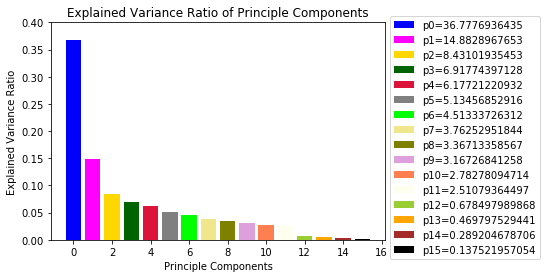

In [5]:
#Colors for each bar
COLORS = ['blue', 'fuchsia', 'gold', 'darkgreen', 'crimson', 'grey', 'lime', 'khaki', 'olive', 'plum', 'coral', 'ivory',
          'yellowgreen', 'orange', 'brown', 'black']

pca_labels = ['p'+str(i)+'='+str(pca.explained_variance_ratio_[i]*100) for i in range(16)]

#For every label add a bar
for i, label in enumerate(pca_labels):
        plt.bar(i, pca.explained_variance_ratio_[i], label = label, color = COLORS[i])

#Graph bells and whistles
plt.title("Explained Variance Ratio of Principle Components")
plt.xlabel('Principle Components')
plt.xticks()
plt.ylabel('Explained Variance Ratio')
plt.ylim((0, .4))
plt.legend(bbox_to_anchor=(1.0, 1.05))


plt.show()

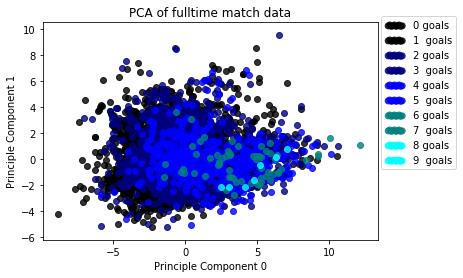

In [40]:
#Colors
colors = ['black', 'navy', 'blue', 'teal', 'cyan']

#Line Width
lw = 1

#For each set of number of goals, graph the appropriate principal component values in that color
for color, i, target_name in zip(colors, [0.0, 2.0, 4.0, 6.0, 8.0, 10.0], ["0 goals","2 goals","4 goals","6 goals","8 goals","10 goals"]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    plt.scatter(X_pca[y == i+1, 0], X_pca[y == i+1, 1], color=color, alpha=.8, lw=lw, label=str(int(i+1))+' '+target_name[1:])
    
plt.legend(bbox_to_anchor=(1.25, 1.05), shadow=False, scatterpoints=10)
plt.title('PCA of fulltime match data')
plt.xlabel('Principle Component 0')
plt.ylabel('Principle Component 1')
plt.show()